# Group 8

# Spotify Data Analysis

# Group members:


1.  Samiksha Baraskar
2.  Deepshikha Soni



In [546]:
#Importing all Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [547]:
#Load the data into a pandas DataFrame:
data = pd.read_csv("dataset.csv")
data.head()

Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   
3  Can't Help Falling In Love          71       201933     False   
4                     Hold On          82       198853     False   

   danceability  energy  ...  loudness  mode  speechiness  acousticness  \
0         0.676  0.4610  ...    -6.746     0       0.1430        0.0322   
1         0.420  0.1660  ...   -17.235     1       0.0763        0.9240   
2         0.438  0.3590  ...    -9.734     1       0.0557        0.2100   
3         0.266  0.0596  ...   -18.515     1       0.0363        0.9050   
4         0.618  0.4430  ...    -9.681     1       0.0526        0.4690   

   instrumentalness  liveness  valence    tempo  time_signature  track_genre  
0          0.000001    0.3580    0.715   87.917               4     acoustic  
1          0.000006    0.1010    0.267   77.489               4     acoustic  
2          0.000000    0.1170    0.120   76.332               4     acoustic  
3          0.000071    0.1320    0.143  181.740               3     acoustic  
4          0.000000    0.0829    0.167  119.949               4     acoustic  

[5 rows x 21 columns]

In [548]:
#Dropping unnamed index column from the DataFrame
data = data.drop(data.columns[0], axis=1)
data

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [549]:
data.shape

(114000, 20)

There are total 114000 rows and 20 columns in the original dataframe.

##1.DATA CLEANING :

In [550]:
#Calculating the number of missing values in the dataset
na_counts = data.isna().sum()
na_counts

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [551]:
#Removing missing values values from the DataFrame
data = data.dropna()
data

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [552]:
#duplicates should be based on track id, therefore we have to remove those instances which have duplicate track ID
#Counting duplicates in track ID column
column_name = 'track_id'
duplicates = data.duplicated(subset=column_name).sum()

print("Total duplicates in column '{}': {}".format(column_name, duplicates))

Total duplicates in column 'track_id': 24259


In [553]:
#Lets Count duplicates in a track_name column also. As
column_name = 'track_name'
duplicates = data.duplicated(subset=column_name).sum()

print("Total duplicates in column '{}': {}".format(column_name, duplicates))

Total duplicates in column 'track_name': 40391


It is obvious for track_name to have duplicates, therefore don't consider duplicates for this column

But we have 24259 duplicates in track_id, which means duplicate entries, So lets try to find all these duplicate tracks.

In [554]:
#Finding duplicates based on 'track_id' column
duplicates = data[data.duplicated(subset='track_id',keep=False)]

#Sorting the dataframe in increasing order of 'track_id'
data_sorted = duplicates.sort_values('track_id')

data_sorted[['track_id','track_name','artists']]

track_id                                track_name  \
15028   001APMDOl3qtx1526T11n1                                    Better   
103211  001APMDOl3qtx1526T11n1                                    Better   
85578   001YQlnDSduXd5LgBd66gT  El Tiempo Es Dinero - Remasterizado 2007   
100420  001YQlnDSduXd5LgBd66gT  El Tiempo Es Dinero - Remasterizado 2007   
91801   003vvx7Niy0yvhvHt4a68B                            Mr. Brightside   
...                        ...                                       ...   
72679   7zv2vmZq8OjS54BxFzI2wM                      Lets Start the Party   
22326   7zv2vmZq8OjS54BxFzI2wM                      Lets Start the Party   
2004    7zwn1eykZtZ5LODrf7c0tS                        You Get Me So High   
3100    7zwn1eykZtZ5LODrf7c0tS                        You Get Me So High   
91401   7zwn1eykZtZ5LODrf7c0tS                        You Get Me So High   

                  artists  
15028   Pink Sweat$;Kirby  
103211  Pink Sweat$;Kirby  
85578         Soda Stereo  
100420        Soda Stereo  
91801         The Killers  
...                   ...  
72679              Attila  
22326              Attila  
2004    The Neighbourhood  
3100    The Neighbourhood  
91401   The Neighbourhood  

[40900 rows x 3 columns]

What we can see from the above data is that there are around 40900 duplicates, that is these instances have the same track_id, track_name and also same arists. Therefore we should only keep the first instance that comes up for each track_id column.

In [555]:
data.shape

(113999, 20)

In [556]:
#Removing duplicates of 'track_id' column and keeping the first instance that comes up for each track_id column.
data = data.drop_duplicates(subset='track_id')
data

track_id                 artists  \
0       5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1       4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2       1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3       6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4       5vjLSffimiIP26QG5WcN2K        Chord Overstreet   
...                        ...                     ...   
113995  2C3TZjDRiAzdyViavDJ217           Rainy Lullaby   
113996  1hIz5L4IB9hN3WRYPOCGPw           Rainy Lullaby   
113997  6x8ZfSoqDjuNa5SVP5QjvX           Cesária Evora   
113998  2e6sXL2bYv4bSz6VTdnfLs        Michael W. Smith   
113999  2hETkH7cOfqmz3LqZDHZf5           Cesária Evora   

                                               album_name  \
0                                                  Comedy   
1                                        Ghost (Acoustic)   
2                                          To Begin Again   
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
...                                                   ...   
113995  #mindfulness - Soft Rain for Mindful Meditatio...   
113996  #mindfulness - Soft Rain for Mindful Meditatio...   
113997                                            Best Of   
113998                                  Change Your World   
113999                                     Miss Perfumado   

                        track_name  popularity  duration_ms  explicit  \
0                           Comedy          73       230666     False   
1                 Ghost - Acoustic          55       149610     False   
2                   To Begin Again          57       210826     False   
3       Can't Help Falling In Love          71       201933     False   
4                          Hold On          82       198853     False   
...                            ...         ...          ...       ...   
113995         Sleep My Little Boy          21       384999     False   
113996            Water Into Light          22       385000     False   
113997              Miss Perfumado          22       271466     False   
113998                     Friends          41       283893     False   
113999                   Barbincor          22       241826     False   

        danceability  energy  key  loudness  mode  speechiness  acousticness  \
0              0.676  0.4610    1    -6.746     0       0.1430        0.0322   
1              0.420  0.1660    1   -17.235     1       0.0763        0.9240   
2              0.438  0.3590    0    -9.734     1       0.0557        0.2100   
3              0.266  0.0596    0   -18.515     1       0.0363        0.9050   
4              0.618  0.4430    2    -9.681     1       0.0526        0.4690   
...              ...     ...  ...       ...   ...          ...           ...   
113995         0.172  0.2350    5   -16.393     1       0.0422        0.6400   
113996         0.174  0.1170    0   -18.318     0       0.0401        0.9940   
113997         0.629  0.3290    0   -10.895     0       0.0420        0.8670   
113998         0.587  0.5060    7   -10.889     1       0.0297        0.3810   
113999         0.526  0.4870    1   -10.204     0       0.0725        0.6810   

        instrumentalness  liveness  valence    tempo  time_signature  \
0               0.000001    0.3580   0.7150   87.917               4   
1               0.000006    0.1010   0.2670   77.489               4   
2               0.000000    0.1170   0.1200   76.332               4   
3               0.000071    0.1320   0.1430  181.740               3   
4               0.000000    0.0829   0.1670  119.949               4   
...                  ...       ...      ...      ...             ...   
113995          0.928000    0.0863   0.0339  125.995               5   
113996          0.976000    0.1050   0.0350   85.239               4   
113997          0.000000    0.0839   0.7430  132.378               4   
113998          0.000000    0.2700

In [557]:
data.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          89740 non-null  object 
 1   artists           89740 non-null  object 
 2   album_name        89740 non-null  object 
 3   track_name        89740 non-null  object 
 4   popularity        89740 non-null  int64  
 5   duration_ms       89740 non-null  int64  
 6   explicit          89740 non-null  bool   
 7   danceability      89740 non-null  float64
 8   energy            89740 non-null  float64
 9   key               89740 non-null  int64  
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  speechiness       89740 non-null  float64
 13  acousticness      89740 non-null  float64
 14  instrumentalness  89740 non-null  float64
 15  liveness          89740 non-null  float64
 16  valence           89740 non-null  float

##2 .FEATURE ENGINEERING :

In [559]:
#Duration can be expressed in minutes, instead of milliseconds. This is because songs are generally a few minutes long.
data['duration_m'] = data['duration_ms']/60000
data = data.reindex(sorted(data.columns), axis=1)
data

<ipython-input-559-e7969ecd66b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['duration_m'] = data['duration_ms']/60000


acousticness                                         album_name  \
0             0.0322                                             Comedy   
1             0.9240                                   Ghost (Acoustic)   
2             0.2100                                     To Begin Again   
3             0.9050  Crazy Rich Asians (Original Motion Picture Sou...   
4             0.4690                                            Hold On   
...              ...                                                ...   
113995        0.6400  #mindfulness - Soft Rain for Mindful Meditatio...   
113996        0.9940  #mindfulness - Soft Rain for Mindful Meditatio...   
113997        0.8670                                            Best Of   
113998        0.3810                                  Change Your World   
113999        0.6810                                     Miss Perfumado   

                       artists  danceability  duration_m  duration_ms  energy  \
0                  Gen Hoshino         0.676    3.844433       230666  0.4610   
1                 Ben Woodward         0.420    2.493500       149610  0.1660   
2       Ingrid Michaelson;ZAYN         0.438    3.513767       210826  0.3590   
3                 Kina Grannis         0.266    3.365550       201933  0.0596   
4             Chord Overstreet         0.618    3.314217       198853  0.4430   
...                        ...           ...         ...          ...     ...   
113995           Rainy Lullaby         0.172    6.416650       384999  0.2350   
113996           Rainy Lullaby         0.174    6.416667       385000  0.1170   
113997           Cesária Evora         0.629    4.524433       271466  0.3290   
113998        Michael W. Smith         0.587    4.731550       283893  0.5060   
113999           Cesária Evora         0.526    4.030433       241826  0.4870   

        explicit  instrumentalness  key  ...  loudness  mode  popularity  \
0          False          0.000001    1  ...    -6.746     0          73   
1          False          0.000006    1  ...   -17.235     1          55   
2          False          0.000000    0  ...    -9.734     1          57   
3          False          0.000071    0  ...   -18.515     1          71   
4          False          0.000000    2  ...    -9.681     1          82   
...          ...               ...  ...  ...       ...   ...         ...   
113995     False          0.928000    5  ...   -16.393     1          21   
113996     False          0.976000    0  ...   -18.318     0          22   
113997     False          0.000000    0  ...   -10.895     0          22   
113998     False          0.000000    7  ...   -10.889     1          41   
113999     False          0.000000    1  ...   -10.204     0          22   

        speechiness    tempo  time_signature  track_genre  \
0            0.1430   87.917               4     acoustic   
1            0.0763   77.489               4     acoustic   
2            0.0557   76.332               4     acoustic   
3            0.0363  181.740               3     acoustic   
4            0.0526  119.949               4     acoustic   
...             ...      ...             ...          ...   
113995       0.0422  125.995               5  world-music   
113996       0.0401   85.239               4  world-music   
113997       0.0420  132.378               4  world-music   
113998       0.0297  135.960               4  world-music   
113999       0.0725   79.198               4  world-music   

                      track_id                  track_name valence  
0       5SuOikwiRyPMVoIQDJUgSV                      Comedy  0.7150  
1       4qPNDBW1i3p13qLCt0Ki3A            Ghost - Acoustic  0.2670  
2       1iJBSr7s7jYXzM8EGcbK5b              To Begin Again  0.1200  
3       6lfxq3CG4xtTiEg7opyCyx  Can't Help Falling In Love  0.1430  
4       5vjLSffimiIP26QG5WcN2K                     Hold On  0.1670  
...                        ...                         ...     ...  
11399

In [560]:
data.drop(columns="duration_ms",inplace=True)

In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      89740 non-null  float64
 1   album_name        89740 non-null  object 
 2   artists           89740 non-null  object 
 3   danceability      89740 non-null  float64
 4   duration_m        89740 non-null  float64
 5   energy            89740 non-null  float64
 6   explicit          89740 non-null  bool   
 7   instrumentalness  89740 non-null  float64
 8   key               89740 non-null  int64  
 9   liveness          89740 non-null  float64
 10  loudness          89740 non-null  float64
 11  mode              89740 non-null  int64  
 12  popularity        89740 non-null  int64  
 13  speechiness       89740 non-null  float64
 14  tempo             89740 non-null  float64
 15  time_signature    89740 non-null  int64  
 16  track_genre       89740 non-null  objec

In [562]:
data.describe()

acousticness  danceability    duration_m        energy  \
count  89740.000000  89740.000000  89740.000000  89740.000000   
mean       0.328285      0.562166      3.819073      0.634458   
std        0.338321      0.176692      1.882430      0.256606   
min        0.000000      0.000000      0.143100      0.000000   
25%        0.017100      0.450000      2.884000      0.457000   
50%        0.188000      0.576000      3.554925      0.676000   
75%        0.625000      0.692000      4.404883      0.853000   
max        0.996000      0.985000     87.288250      1.000000   

       instrumentalness           key      liveness      loudness  \
count      89740.000000  89740.000000  89740.000000  89740.000000   
mean           0.173415      5.283530      0.216971     -8.498994   
std            0.323849      3.559912      0.194885      5.221518   
min            0.000000      0.000000      0.000000    -49.531000   
25%            0.000000      2.000000      0.098200    -10.322250   
50%            0.000058      5.000000      0.132000     -7.185000   
75%            0.097625      8.000000      0.279000     -5.108000   
max            1.000000     11.000000      1.000000      4.532000   

               mode    popularity   speechiness         tempo  time_signature  \
count  89740.000000  89740.000000  89740.000000  89740.000000    89740.000000   
mean       0.636973     33.198808      0.087442    122.058134        3.897426   
std        0.480875     20.580640      0.113278     30.117651        0.453437   
min        0.000000      0.000000      0.000000      0.000000        0.000000   
25%        0.000000     19.000000      0.036000     99.262750        4.000000   
50%        1.000000     33.000000      0.048900    122.013000        4.000000   
75%        1.000000     49.000000      0.085900    140.077000        4.000000   
max        1.000000    100.000000      0.965000    243.372000        5.000000   

            valence  
count  89740.000000  
mean       0.469474  
std        0.262864  
min        0.000000  
25%        0.249000  
50%        0.457000  
75%        0.682000  
max        0.995000

At this point we have 89740 rows and 20 columns

<ipython-input-563-e441c569f991>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


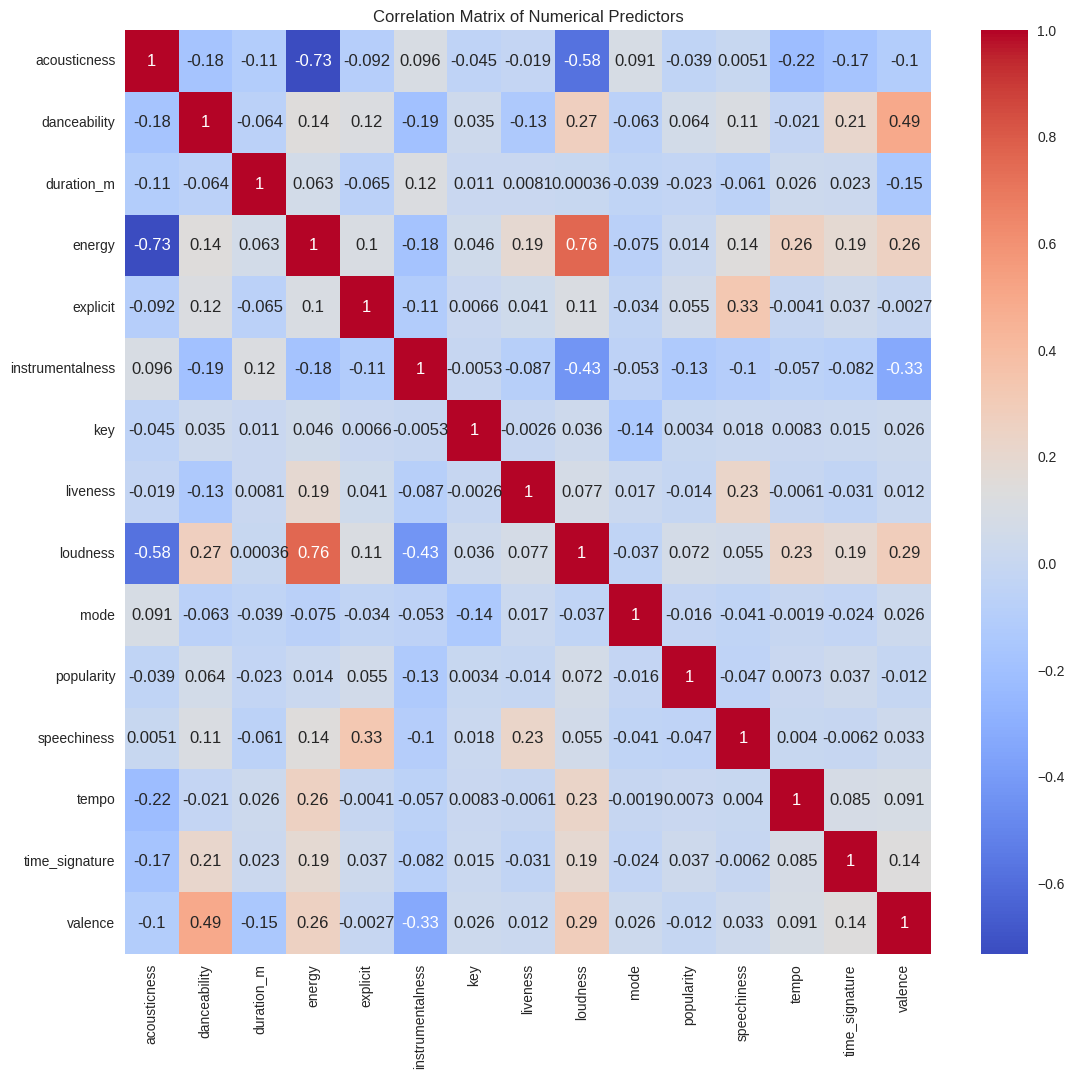

In [563]:
#Compute the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
corr_matrix

# Plot the correlation matrix heat map
plt.figure(figsize=(13, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Predictors')
plt.show()

From the correlation matrix, We see a significant correlation between

a)    
   i)loudness — energy

   ii) valence — danceability

  iii) acousticness - energy
  
  iv) acousticness - loudness

b) Energy — Loudness The track loudness and energy are directly proportional.
So with the increase in loudness of the song, its energy will also increase.

c) Acousticness - energy The track Acousticness and energy are inversely proportional. Which means if the song is acoustic, it will have low energy as more instumental music is used.

d) acousticness - loudness : The track Acousticness and energy are inversely proportional. Which means if the song is acoustic, it will have low  loudness as more instumental music is used.


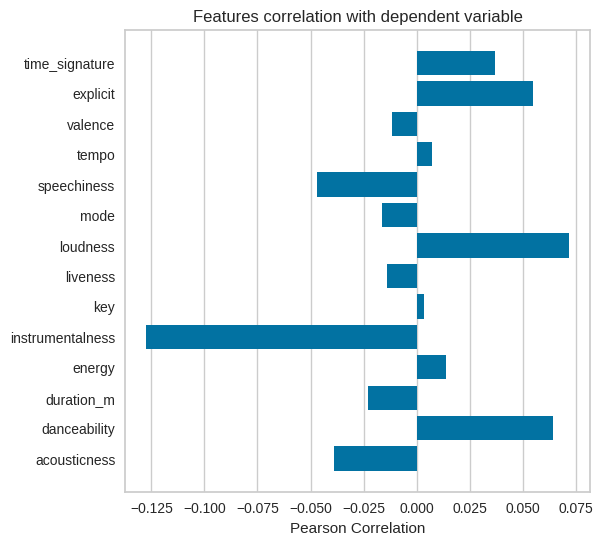

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [564]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness', 'danceability','duration_m','energy', 'instrumentalness','key',
                  'liveness', 'loudness','mode','speechiness', 'tempo', 'valence','explicit','time_signature']

X, y = data[feature_names], data['popularity']

# Create a list of the feature names

features = np.array(feature_names)

# Instantiate the visualizer
visualizer = FeatureCorrelation(labels=features)

plt.rcParams['figure.figsize']=(6,6)
visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()

Now we have to check for outliers for numerical data in the dataset which will contribute to our analysis

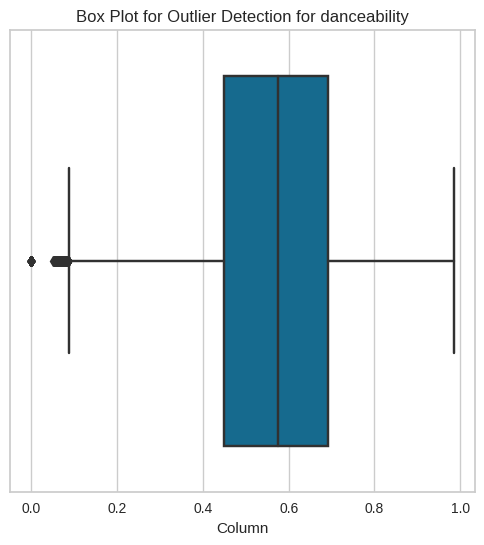

In [565]:
##1. For dancebility
data_dancebility = data[['danceability']]
data_dancebility


#To see more clearly we will Creat a box plot to visualize the distribution and outliers
sns.boxplot(x=data_dancebility['danceability'])
plt.xlabel('Column')
plt.title('Box Plot for Outlier Detection for danceability')
plt.show()

From the box plot it can be seen that dancebility have normal distribution, but there are some outliers. It is possible to have zero dancebility, so this seems okay!

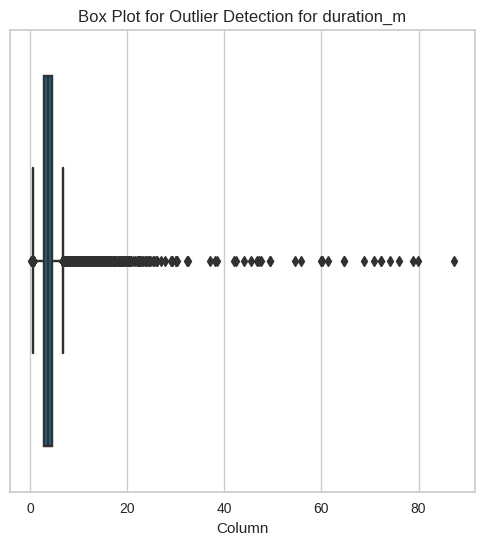

In [566]:
## 2. We will check distribution and outliers for duration_ms
df_duration_ms = data[['duration_m']]
sns.boxplot(x=df_duration_ms['duration_m'])
plt.xlabel('Column')
plt.title('Box Plot for Outlier Detection for duration_m')
plt.show()

From the box plot it can be seen that duration_ms have normal distribution, but there are outliers. Again the duration of songs can differ and it is possible for songs to have duration more than 3 mins! So neglecting this again!

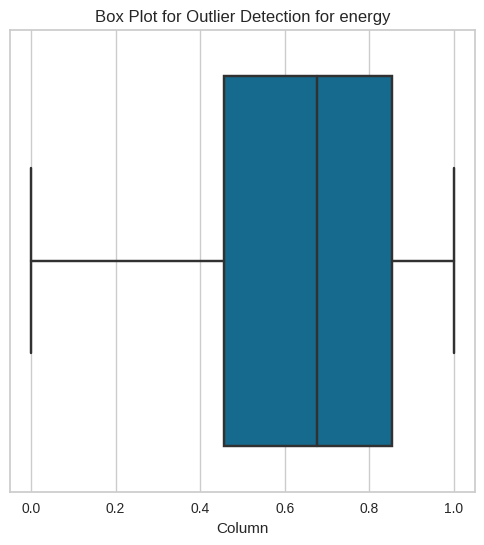

In [567]:
## 3. We will check distribution and outliers for energy
df_energy = data[['energy']]
sns.boxplot(x=df_energy['energy'])
plt.xlabel('Column')
plt.title('Box Plot for Outlier Detection for energy')
plt.show()

From the box plot it can be seen that energy have slightly negatively skewed data with no outliers.

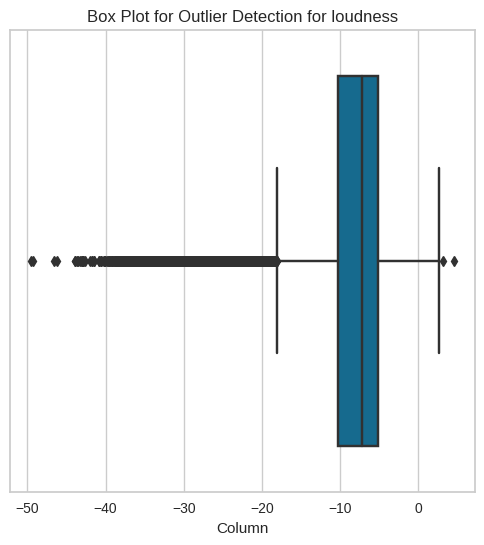

In [568]:
## 4. We will check distribution and outliers for loudness
df_loudness = data[['loudness']]
sns.boxplot(x=df_loudness['loudness'])
plt.xlabel('Column')
plt.title('Box Plot for Outlier Detection for loudness')
plt.show()

From the box plot it can be seen that loudness have outliers, But the loudness of any song depends on the track_genre and by correlation matrix it is visible that it is corelated to energy of the song. So neglecting this again!

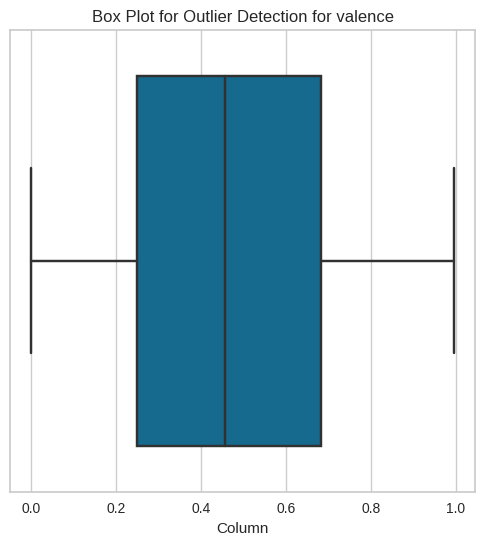

In [569]:
## 5. We will check distribution and outliers for valence
df_loudness = data[['valence']]
sns.boxplot(x=df_loudness['valence'])
plt.xlabel('Column')
plt.title('Box Plot for Outlier Detection for valence')
plt.show()

From the box plot it can be seen that valence have normally distributed data with no outliers.

##3.Visualization and Analysis:

Our next target is to find the answer for the first question.

How is popularity defined?

We can find answer by focusing on the following points.

* Max popularity
* Min popularity
* How many songs have the maximum poularity?
* How many songs have minimum popularity?

In [570]:
# Find the maximum and minimum values of 'popularity' column
max_popularity = data['popularity'].max()
min_popularity = data['popularity'].min()

print("Maximum value of 'popularity' column:", max_popularity)
print("Minimum value of 'popularity' column:", min_popularity)

Maximum value of 'popularity' column: 100
Minimum value of 'popularity' column: 0


<ipython-input-571-c70c9461daeb>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', label='danceability')


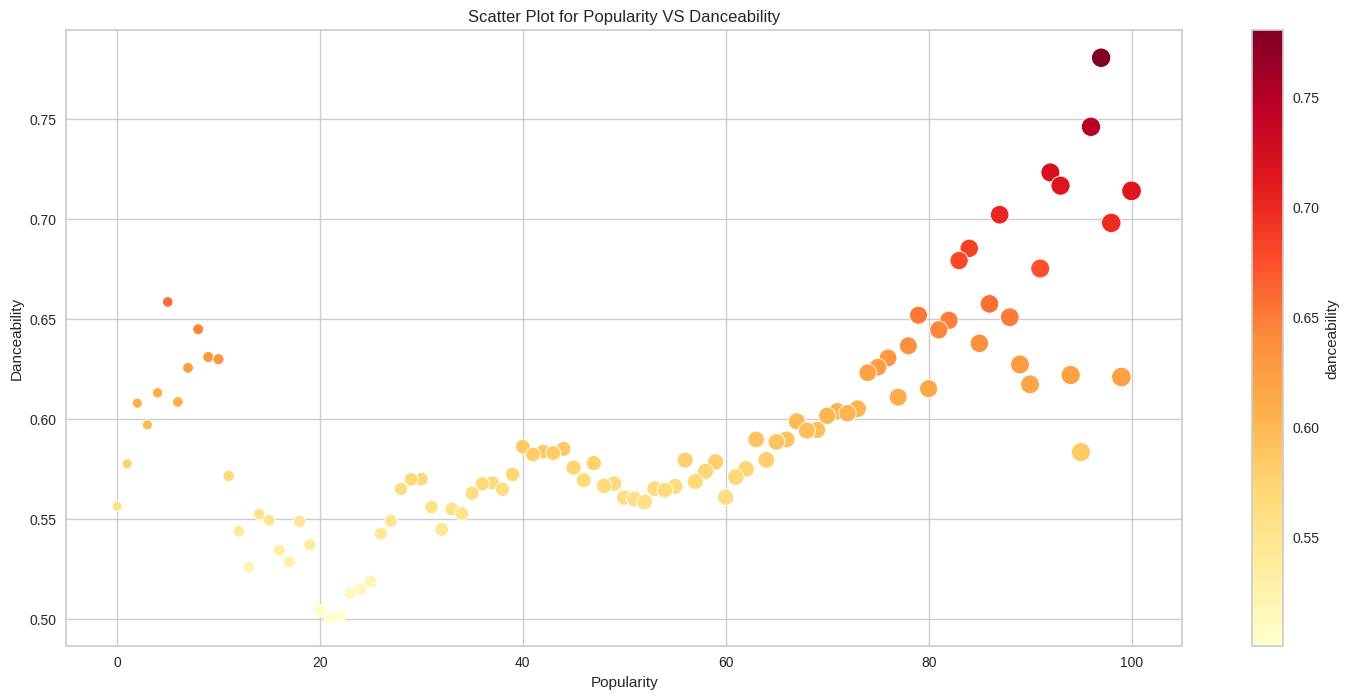

In [571]:
#Calculation relation btw danceability and popularity
data_pop_danc = data.groupby('popularity')['danceability'].mean().sort_values(ascending=False).reset_index()

# Creating the scatter plot using Seaborn
color_palette = sns.color_palette("YlOrRd", as_cmap=True)
plt.figure(figsize=(18, 8))
scatter= sns.scatterplot(data=data_pop_danc, x='popularity', y='danceability', hue='danceability', size='popularity',sizes=(50, 200),palette=color_palette)
plt.title('Scatter Plot for Popularity VS Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')

# Remove the legend and add a color scale bar
scatter.get_legend().remove()
# Add a color scale bar
norm = plt.Normalize(data_pop_danc['danceability'].min(), data_pop_danc['danceability'].max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])  # Important to set an empty array
cbar = plt.colorbar(sm, orientation='vertical', label='danceability')

plt.show()

we realized that 'popularity' and 'danceability' are positively correlated, which implies that, as the popularity of the song increase, the danceability score for that song also increases.

<ipython-input-572-b102618c3884>:18: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', label='valence')


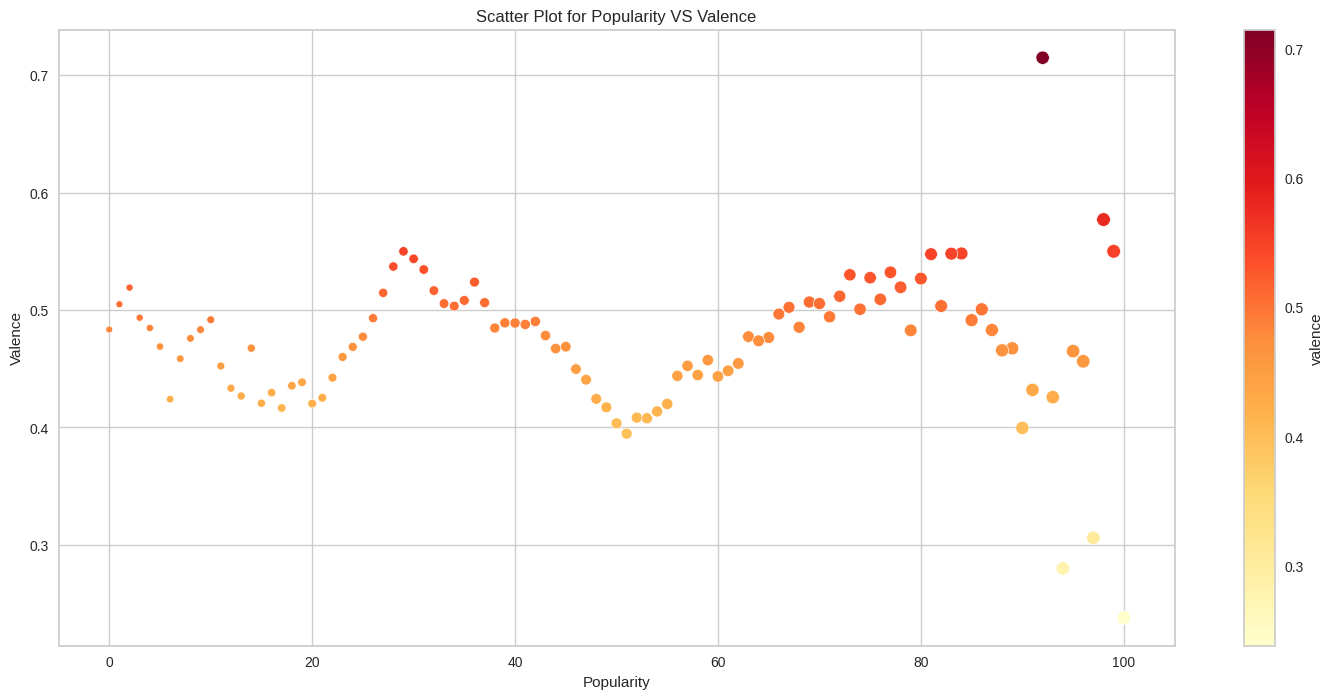

In [572]:
#Calculation relation btw danceability and popularity
data_pop_danc = data.groupby('popularity')['valence'].mean().sort_values(ascending=False).reset_index()

# Creating the scatter plot using Seaborn
color_palette = sns.color_palette("YlOrRd", as_cmap=True)
plt.figure(figsize=(18,8))
scatter = sns.scatterplot(data=data_pop_danc, x='popularity', y='valence', hue='valence', size='popularity', palette=color_palette)
plt.title('Scatter Plot for Popularity VS Valence')
plt.xlabel('Popularity')
plt.ylabel('Valence')

# Remove the legend and add a color scale bar
scatter.get_legend().remove()
# Add a color scale bar
norm = plt.Normalize(data_pop_danc['valence'].min(), data_pop_danc['valence'].max())
sm = plt.cm.ScalarMappable(cmap=color_palette, norm=norm)
sm.set_array([])  # Important to set an empty array
cbar = plt.colorbar(sm, orientation='vertical', label='valence')

plt.show()

we realized that the popularity of the song does not depend on valence and it may vary depending on different features

In [573]:
#Identifying top 10 popular artist
artists_popular = data.sort_values(by=['popularity'], ascending=False).reset_index()
artists_popular[:10]

index  acousticness                                         album_name  \
0  20001       0.01300                          Unholy (feat. Kim Petras)   
1  51664       0.01250              Quevedo: Bzrp Music Sessions, Vol. 52   
2  20008       0.00383                                    I'm Good (Blue)   
3  67356       0.58300                                         La Bachata   
4  67358       0.09010                                   Un Verano Sin Ti   
5  67359       0.09930                                   Un Verano Sin Ti   
6  67559       0.14100                                   Un Verano Sin Ti   
7  20000       0.06350                                  Indigo (Extended)   
8  79000       0.08260  I Ain’t Worried (Music From The Motion Picture...   
9  81052       0.34200                                          As It Was   

                      artists  danceability  duration_m  energy  explicit  \
0        Sam Smith;Kim Petras         0.714    2.615717   0.472     False   
1            Bizarrap;Quevedo         0.621    3.315617   0.782     False   
2     David Guetta;Bebe Rexha         0.561    2.920633   0.965      True   
3               Manuel Turizo         0.835    2.710617   0.679     False   
4  Bad Bunny;Chencho Corleone         0.911    2.976117   0.712      True   
5                   Bad Bunny         0.650    4.061933   0.715     False   
6                   Bad Bunny         0.801    3.551017   0.475     False   
7                 Chris Brown         0.733    3.076883   0.690      True   
8                 OneRepublic         0.704    2.474750   0.797     False   
9                Harry Styles         0.520    2.788383   0.731     False   

   instrumentalness  key  ...  loudness  mode  popularity  speechiness  \
0          0.000005    2  ...    -7.375     1         100       0.0864   
1          0.033000    2  ...    -5.548     1          99       0.0440   
2          0.000007    7  ...    -3.673     0          98       0.0343   
3          0.000002    7  ...    -5.329     0          98       0.0364   
4          0.000027    1  ...    -5.105     0          97       0.0817   
5          0.000291    5  ...    -5.198     0          97       0.2530   
6          0.000017    7  ...    -8.797     0          96       0.0516   
7          0.000001    9  ...    -5.529     0          96       0.0427   
8          0.000745    0  ...    -5.927     1          96       0.0475   
9          0.001010    6  ...    -5.338     0          95       0.0557   

     tempo  time_signature  track_genre                track_id  \
0  131.121               4        dance  3nqQXoyQOWXiESFLlDF1hG   
1  128.033               4      hip-hop  2tTmW7RDtMQtBk7m2rYeSw   
2  128.040               4        dance  4uUG5RXrOk84mYEfFvj3cK   
3  124.980               4        latin  5ww2BF9slyYgNOk37BlC4u   
4   92.005               4        latin  6Sq7ltF9Qa7SNFBsV5Cogx   
5  106.672               4        latin  1IHWl5LamUGEuP4ozKQSXZ   
6   98.047               4        latin  5Eax0qFko2dh7Rl2lYs3bx   
7  116.992               4        dance  5IgjP7X4th6nMNDh4akUHb   
8  139.994               4        piano  4h9wh7iOZ0GGn8QVp4RAOB   
9  173.930               4          pop  4LRPiXqCikLlN15c3yImP7   

                              track_name valence  
0              Unholy (feat. Kim Petras)   0.238  
1  Quevedo: Bzrp Music Sessions, Vol. 52   0.550  
2                        I'm Good (Blue)   0.304  
3                             La Bachata   0.850  
4                        Me Porto Bonito   0.425  
5                       Tití Me Preguntó   0.187  
6                                 Efecto   0.234  
7                    Under The Influence   0.310  
8                        I Ain't Worried   0.825  
9                              As It Was   0.662  

[10 rows x 21 columns]

Here we can see the audio features used by the top 10 artist

In [574]:
print("The Top 10 Artists are : ")
Top_ten_artist = artists_popular['artists'].head(10)
Top_ten_artist

The Top 10 Artists are : 


0          Sam Smith;Kim Petras
1              Bizarrap;Quevedo
2       David Guetta;Bebe Rexha
3                 Manuel Turizo
4    Bad Bunny;Chencho Corleone
5                     Bad Bunny
6                     Bad Bunny
7                   Chris Brown
8                   OneRepublic
9                  Harry Styles
Name: artists, dtype: object

In [575]:
# To find songs having maximum popularity lets assume Songs with popularity >= 90 are popular.
most_popular = data.query('popularity>90', inplace=False).sort_values('popularity', ascending=False).reset_index(drop=True)


In [576]:
print("The Top 10 Popular Songs are : ")
Top_ten_songs = most_popular['album_name'].head(10)
Top_ten_songs

The Top 10 Popular Songs are : 


0                            Unholy (feat. Kim Petras)
1                Quevedo: Bzrp Music Sessions, Vol. 52
2                                      I'm Good (Blue)
3                                           La Bachata
4                                     Un Verano Sin Ti
5                                     Un Verano Sin Ti
6                                     Un Verano Sin Ti
7                                    Indigo (Extended)
8    I Ain’t Worried (Music From The Motion Picture...
9                                     Un Verano Sin Ti
Name: album_name, dtype: object

###Now lets check if the top 10 Artist are the one with the Top 10 popular songs :

In [577]:
print("The Top 10 Popular Songs and their Artist are : ")
Top_10 = pd.concat([Top_ten_songs,Top_ten_artist],axis=1)
Top_10

The Top 10 Popular Songs and their Artist are : 


album_name  \
0                          Unholy (feat. Kim Petras)   
1              Quevedo: Bzrp Music Sessions, Vol. 52   
2                                    I'm Good (Blue)   
3                                         La Bachata   
4                                   Un Verano Sin Ti   
5                                   Un Verano Sin Ti   
6                                   Un Verano Sin Ti   
7                                  Indigo (Extended)   
8  I Ain’t Worried (Music From The Motion Picture...   
9                                   Un Verano Sin Ti   

                      artists  
0        Sam Smith;Kim Petras  
1            Bizarrap;Quevedo  
2     David Guetta;Bebe Rexha  
3               Manuel Turizo  
4  Bad Bunny;Chencho Corleone  
5                   Bad Bunny  
6                   Bad Bunny  
7                 Chris Brown  
8                 OneRepublic  
9                Harry Styles

Here, We can no go ahead with the hypothesis that the top 10 artists are the ones who have the top 10 popular songs.

The audio features used by these artists for their popular songs are the one which will help the new artist to increase there popularity.

Lets look at the audio features of the most popular song and popular artist :

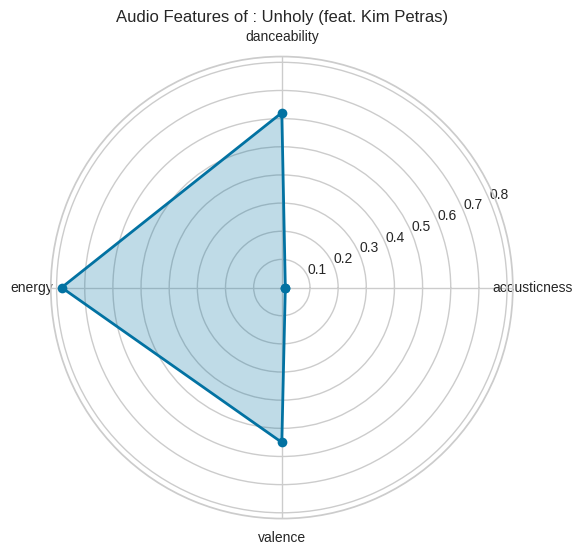

In [578]:
#Finding the audio features of one of the most Popular songs
labels = np.array(['acousticness', 'danceability', 'energy', 'valence'])
song = most_popular.loc[1,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:4], labels)
ax.set_title('Audio Features of : ' + most_popular.at[0,'track_name'])
ax.grid(True)

Now lets look at the audio features of the least popular (unpopular) song and artist :

In [579]:
# Find songs with popularity 0
songs_with_popularity_0 = data[data['popularity'] == 0]
# Least famous artist - artists with maximum songs in the songs_with_popularity_0
# Group the dataframe by 'artist' and count the number of songs
least_famous_artist = songs_with_popularity_0.groupby('artists').size().reset_index(name='song_count_popularity0')
least_famous_artist_sorted = least_famous_artist.sort_values('song_count_popularity0',ascending=False)
least_famous_artist_sorted_10 = least_famous_artist_sorted.head(10)
least_famous_artist_sorted_10.reset_index(drop=True)

artists  song_count_popularity0
0  Ella Fitzgerald                     100
1      Dean Martin                     100
2    Nat King Cole                      97
3    Stevie Wonder                      78
4   The Beach Boys                      74
5    The Jackson 5                      73
6       Brenda Lee                      70
7      Norah Jones                      66
8     Oleg Pogudin                      57
9      Vadim Kozin                      50

In [580]:
songs_with_popularity_0['album_name'].head(10).unique()

array(['Coffee Moment', 'Human - Best Adult Pop Tunes',
       'Holly Jolly Christmas', 'Feeling Good - Adult Pop Favorites',
       'Christmas Time', 'Perfect Christmas Hits', 'Merry Christmas',
       'Christmas Music - Holiday Hits', 'Christmas Country Songs 2022'],
      dtype=object)

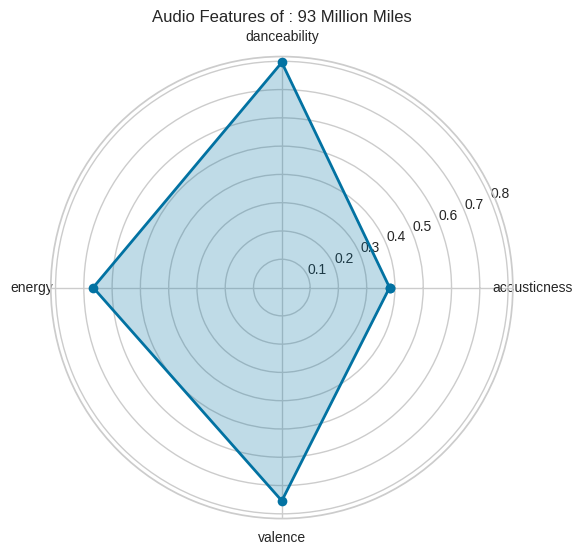

In [581]:
#Finding the audio features of one of the most Popular songs
songs_with_popularity_0=songs_with_popularity_0.reset_index(drop=True)
labels = np.array(['acousticness', 'danceability', 'energy', 'valence'])
song = songs_with_popularity_0.loc[1,labels].values
angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
song = np.concatenate((song,[song[0]]))
angles = np.concatenate((angles,[angles[0]]))

#Radar Chart
fig=plt.show()
ax = plt.subplot(111, polar=True)
ax.plot(angles, song, 'o-', linewidth=2)
ax.fill(angles, song, alpha=0.25)
ax.set_thetagrids((angles * 180/np.pi)[0:4], labels)
ax.set_title('Audio Features of : ' + songs_with_popularity_0.at[0,'track_name'])
ax.grid(True)

#4.PCA Analysis :

In [582]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA

In [583]:
# Drop non-numeric columns
numeric_data = data.drop(["album_name", "artists", "track_name","track_id"], axis=1)

In [584]:
numeric_data

acousticness  danceability  duration_m  energy  explicit  \
0             0.0322         0.676    3.844433  0.4610     False   
1             0.9240         0.420    2.493500  0.1660     False   
2             0.2100         0.438    3.513767  0.3590     False   
3             0.9050         0.266    3.365550  0.0596     False   
4             0.4690         0.618    3.314217  0.4430     False   
...              ...           ...         ...     ...       ...   
113995        0.6400         0.172    6.416650  0.2350     False   
113996        0.9940         0.174    6.416667  0.1170     False   
113997        0.8670         0.629    4.524433  0.3290     False   
113998        0.3810         0.587    4.731550  0.5060     False   
113999        0.6810         0.526    4.030433  0.4870     False   

        instrumentalness  key  liveness  loudness  mode  popularity  \
0               0.000001    1    0.3580    -6.746     0          73   
1               0.000006    1    0.1010   -17.235     1          55   
2               0.000000    0    0.1170    -9.734     1          57   
3               0.000071    0    0.1320   -18.515     1          71   
4               0.000000    2    0.0829    -9.681     1          82   
...                  ...  ...       ...       ...   ...         ...   
113995          0.928000    5    0.0863   -16.393     1          21   
113996          0.976000    0    0.1050   -18.318     0          22   
113997          0.000000    0    0.0839   -10.895     0          22   
113998          0.000000    7    0.2700   -10.889     1          41   
113999          0.000000    1    0.0893   -10.204     0          22   

        speechiness    tempo  time_signature  track_genre  valence  
0            0.1430   87.917               4     acoustic   0.7150  
1            0.0763   77.489               4     acoustic   0.2670  
2            0.0557   76.332               4     acoustic   0.1200  
3            0.0363  181.740               3     acoustic   0.1430  
4            0.0526  119.949               4     acoustic   0.1670  
...             ...      ...             ...          ...      ...  
113995       0.0422  125.995               5  world-music   0.0339  
113996       0.0401   85.239               4  world-music   0.0350  
113997       0.0420  132.378               4  world-music   0.7430  
113998       0.0297  135.960               4  world-music   0.4130  
113999       0.0725   79.198               4  world-music   0.7080  

[89740 rows x 16 columns]

Here we are keeping the "track_genre" feature as it contributes significantly to the popularity of the song

In [585]:
#one hot encoding the origin feature as it is a nominal values with no order
one_hot = pd.get_dummies(numeric_data['track_genre'],prefix = 'Track_genre')

In [586]:
numeric_data = numeric_data.drop('track_genre',axis = 1)         # dropping original genre column

In [587]:
encoded_df = pd.concat([numeric_data,one_hot],axis=1)
encoded_df

acousticness  danceability  duration_m  energy  explicit  \
0             0.0322         0.676    3.844433  0.4610     False   
1             0.9240         0.420    2.493500  0.1660     False   
2             0.2100         0.438    3.513767  0.3590     False   
3             0.9050         0.266    3.365550  0.0596     False   
4             0.4690         0.618    3.314217  0.4430     False   
...              ...           ...         ...     ...       ...   
113995        0.6400         0.172    6.416650  0.2350     False   
113996        0.9940         0.174    6.416667  0.1170     False   
113997        0.8670         0.629    4.524433  0.3290     False   
113998        0.3810         0.587    4.731550  0.5060     False   
113999        0.6810         0.526    4.030433  0.4870     False   

        instrumentalness  key  liveness  loudness  mode  ...  \
0               0.000001    1    0.3580    -6.746     0  ...   
1               0.000006    1    0.1010   -17.235     1  ...   
2               0.000000    0    0.1170    -9.734     1  ...   
3               0.000071    0    0.1320   -18.515     1  ...   
4               0.000000    2    0.0829    -9.681     1  ...   
...                  ...  ...       ...       ...   ...  ...   
113995          0.928000    5    0.0863   -16.393     1  ...   
113996          0.976000    0    0.1050   -18.318     0  ...   
113997          0.000000    0    0.0839   -10.895     0  ...   
113998          0.000000    7    0.2700   -10.889     1  ...   
113999          0.000000    1    0.0893   -10.204     0  ...   

        Track_genre_spanish  Track_genre_study  Track_genre_swedish  \
0                         0                  0                    0   
1                         0                  0                    0   
2                         0                  0                    0   
3                         0                  0                    0   
4                         0                  0                    0   
...                     ...                ...                  ...   
113995                    0                  0                    0   
113996                    0                  0                    0   
113997                    0                  0                    0   
113998                    0                  0                    0   
113999                    0                  0                    0   

        Track_genre_synth-pop  Track_genre_tango  Track_genre_techno  \
0                           0                  0                   0   
1                           0                  0                   0   
2                           0                  0                   0   
3                           0                  0                   0   
4                           0                  0                   0   
...                       ...                ...                 ...   
113995                      0                  0                   0   
113996                      0                  0                   0   
113997                      0                  0                   0   
113998                      0                  0                   0   
113999                      0                  0                   0   

        Track_genre_trance  Track_genre_trip-hop  Track_genre_turkish  \
0                        0                     0                    0   
1                        0                     0                    0   
2                        0                     0                    0   
3                        0                     0                    0   
4                        0                     0                    0   
...                    ...                   ...                  ...   
113995                   0                     0                    0   
113996                   0                     0                    0   
113997                   0                     

In [588]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89740 entries, 0 to 113999
Columns: 128 entries, acousticness to Track_genre_world-music
dtypes: bool(1), float64(10), int64(4), uint8(113)
memory usage: 20.0 MB


In [589]:
#Calculating the number of missing values in the dataset
na2_counts = encoded_df.isna().sum()
na2_counts

acousticness               0
danceability               0
duration_m                 0
energy                     0
explicit                   0
                          ..
Track_genre_techno         0
Track_genre_trance         0
Track_genre_trip-hop       0
Track_genre_turkish        0
Track_genre_world-music    0
Length: 128, dtype: int64

In [590]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(encoded_df)


In [591]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([2.83790653e-02, 1.69804040e-02, 1.58198887e-02, 1.31850096e-02,
       1.23959059e-02, 1.06620010e-02, 9.94391301e-03, 9.55119035e-03,
       9.13420952e-03, 8.68634384e-03, 8.54705689e-03, 8.36353036e-03,
       8.20259907e-03, 8.15500878e-03, 7.94675753e-03, 7.90044522e-03,
       7.90041921e-03, 7.90034791e-03, 7.90030790e-03, 7.90027193e-03,
       7.90016284e-03, 7.90012416e-03, 7.90008034e-03, 7.90000063e-03,
       7.89990058e-03, 7.89973289e-03, 7.89966837e-03, 7.89958366e-03,
       7.89938514e-03, 7.89896344e-03, 7.89862678e-03, 7.89854229e-03,
       7.89829576e-03, 7.89813404e-03, 7.89805503e-03, 7.89776974e-03,
       7.89759093e-03, 7.89666334e-03, 7.89596983e-03, 7.89581904e-03,
       7.89562203e-03, 7.89534915e-03, 7.89497373e-03, 7.89463821e-03,
       7.89456310e-03, 7.89431198e-03, 7.89405449e-03, 7.89355949e-03,
       7.89328370e-03, 7.89295820e-03, 7.89268796e-03, 7.89239000e-03,
       7.89202072e-03, 7.89185183e-03, 7.89180960e-03, 7.89135125e-03,
      

In [592]:
cum_explained_variance = np.cumsum(explained_variance_ratio)
num_components_to_keep = np.argmax(cum_explained_variance >= 0.9) + 1
num_components_to_keep

107

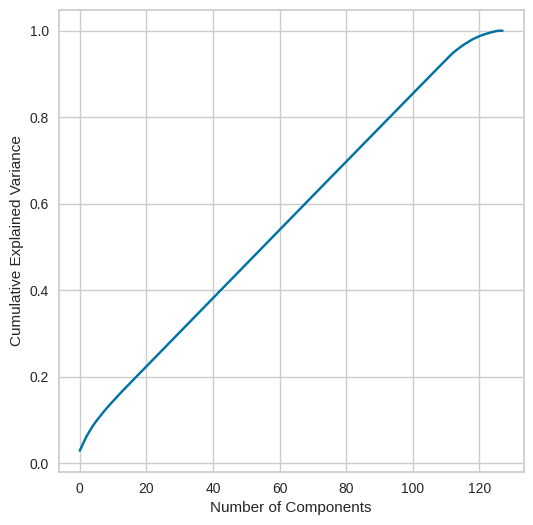

In [593]:
import matplotlib.pyplot as plt

plt.plot(cum_explained_variance)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [594]:
pca_components = pca.components_

# Create a DataFrame to show loadings
loadings_df = pd.DataFrame(pca_components, columns=encoded_df.columns)

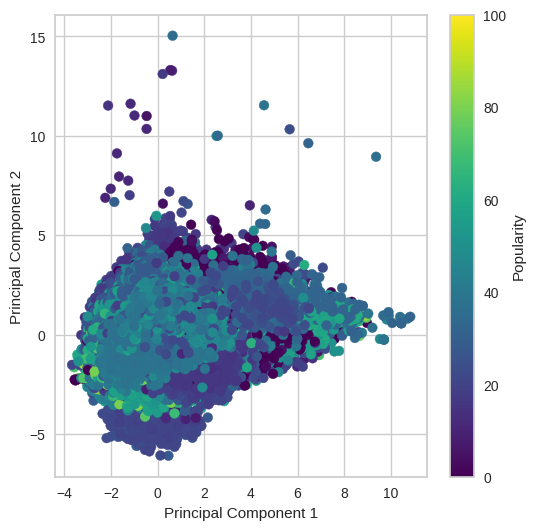

In [595]:
reduced_data = principal_components[:, :num_components_to_keep]

# Visualize reduced data using scatter plot
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=encoded_df['popularity'],cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Popularity')
plt.show()

##5. Data Modelling :

####1.Multiple Linear Regression:

In [596]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define the target variable
target_variable = encoded_df['popularity']

# Assuming reduced_data contains the PCA-transformed data
X_train, X_test, y_train, y_test = train_test_split(reduced_data, target_variable, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

LinearRegression()

In [597]:
# Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficient_of_determination = r2_score(y_test, y_pred)
acc_linear_reg = round(lr_model.score(X_train,y_train) * 100, 2)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Coefficient of Determination:", coefficient_of_determination)
print("Accuracy :",acc_linear_reg)

Mean Squared Error: 97.2594381340612
R-squared: 0.76745292673175
Coefficient of Determination: 0.76745292673175
Accuracy : 77.2


####2.Decision Tree :

In [598]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=42)

In [599]:
# Make predictions on the test set
dt_predictions = dt_model.predict(X_test)

# Evaluate the model's performance
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)
dt_model.score(X_train,y_train)
acc_decision_tree = round(dt_model.score(X_train,y_train) * 100, 2)

print("Decision Tree MSE:", dt_mse)
print("Decision Tree R-squared:", dt_r2)
print("Accuracy :",acc_decision_tree)

Decision Tree MSE: 57.42316692667707
Decision Tree R-squared: 0.8627013515316991
Accuracy : 100.0


####3. Random Forest :

In [600]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, max_features='sqrt', random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=50, random_state=42)

In [601]:
# Make predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Evaluate the model's performance
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
acc_random_forest = round(rf_model.score(X_train,y_train) * 100, 2)

print("Random Forest MSE:", rf_mse)
print("Random Forest R-squared:", rf_r2)
print("Accuracy :",acc_random_forest)

Random Forest MSE: 42.4458763093381
Random Forest R-squared: 0.8985120159296301
Accuracy : 98.49


####4. Neural Network :

In [602]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# Create a Neural Network Regressor
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Fit the model on the standardized training data
nn_model.fit(scaled_X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

In [603]:
# Make predictions on the standardized test set
nn_predictions = nn_model.predict(scaled_X_test)

# Evaluate the model's performance
nn_mse = mean_squared_error(y_test, nn_predictions)
nn_r2 = r2_score(y_test, nn_predictions)
acc_neural_network = round(nn_model.score(X_train,y_train) * 100, 2)

print("Neural Network MSE:", nn_mse)
print("Neural Network R-squared:", nn_r2)
print("Accuracy :",acc_neural_network)

Neural Network MSE: 0.13873419792001712
Neural Network R-squared: 0.9996682868798393
Accuracy : 75.65


Lets check the predictions done by each model with a random record :

In [604]:
import random

# Select a random index from the test data
random_index = random.randint(0, len(X_test) - 1)

# Take a random record from the test data
random_test_record = X_test[random_index]

lr_model_prediction = lr_model.predict([random_test_record])

# Predict popularity using Decision Tree model
dt_random_prediction = dt_model.predict([random_test_record])

# Predict popularity using Random Forest model
rf_random_prediction = rf_model.predict([random_test_record])

# Predict popularity using Neural Network model
scaled_random_test_record = scaler.transform([random_test_record])  # Scale the features
nn_random_prediction = nn_model.predict(scaled_random_test_record)

# Display actual popularity and predictions
print("Actual Popularity:", y_test.iloc[random_index])
print("Multiple Linear Regression Predicted Popularity:", lr_model_prediction[0])
print("Decision Tree Predicted Popularity:", dt_random_prediction[0])
print("Random Forest Predicted Popularity:", rf_random_prediction[0])
print("Neural Network Predicted Popularity:", nn_random_prediction[0])

Actual Popularity: 11
Multiple Linear Regression Predicted Popularity: 11.254250442299114
Decision Tree Predicted Popularity: 14.0
Random Forest Predicted Popularity: 12.02
Neural Network Predicted Popularity: 10.97234014736126


We decide to go with Random Forest Model to avoid the overfitting as well as underfitting of the model.

##6.Optimizing the Model :

In [605]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

# Select a smaller subset of the data for initial testing
subset_size = 500  # Adjust this number as needed


X_train, X_test, y_train, y_test = train_test_split(reduced_data, target_variable, test_size=0.2, random_state=42)
# Create a subset of your data
X_train_subset = X_train[:subset_size]
y_train_subset = y_train[:subset_size]

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],     # Adjust as needed
    'max_depth': [None, 10, 20],        # Adjust as needed
    'min_samples_split': [2, 5, 10],    # Adjust as needed
}

# Create Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42,n_estimators=50, max_features='sqrt')

# Create GridSearchCV object with cross-validation
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model using GridSearchCV with cross-validation on the subset
grid_search_rf.fit(X_train_subset, y_train_subset)

# Print the best hyperparameters
print("Best Hyperparameters for Random Forest:", grid_search_rf.best_params_)


Best Hyperparameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


Final Model :

In [606]:
numeric_data

acousticness  danceability  duration_m  energy  explicit  \
0             0.0322         0.676    3.844433  0.4610     False   
1             0.9240         0.420    2.493500  0.1660     False   
2             0.2100         0.438    3.513767  0.3590     False   
3             0.9050         0.266    3.365550  0.0596     False   
4             0.4690         0.618    3.314217  0.4430     False   
...              ...           ...         ...     ...       ...   
113995        0.6400         0.172    6.416650  0.2350     False   
113996        0.9940         0.174    6.416667  0.1170     False   
113997        0.8670         0.629    4.524433  0.3290     False   
113998        0.3810         0.587    4.731550  0.5060     False   
113999        0.6810         0.526    4.030433  0.4870     False   

        instrumentalness  key  liveness  loudness  mode  popularity  \
0               0.000001    1    0.3580    -6.746     0          73   
1               0.000006    1    0.1010   -17.235     1          55   
2               0.000000    0    0.1170    -9.734     1          57   
3               0.000071    0    0.1320   -18.515     1          71   
4               0.000000    2    0.0829    -9.681     1          82   
...                  ...  ...       ...       ...   ...         ...   
113995          0.928000    5    0.0863   -16.393     1          21   
113996          0.976000    0    0.1050   -18.318     0          22   
113997          0.000000    0    0.0839   -10.895     0          22   
113998          0.000000    7    0.2700   -10.889     1          41   
113999          0.000000    1    0.0893   -10.204     0          22   

        speechiness    tempo  time_signature  valence  
0            0.1430   87.917               4   0.7150  
1            0.0763   77.489               4   0.2670  
2            0.0557   76.332               4   0.1200  
3            0.0363  181.740               3   0.1430  
4            0.0526  119.949               4   0.1670  
...             ...      ...             ...      ...  
113995       0.0422  125.995               5   0.0339  
113996       0.0401   85.239               4   0.0350  
113997       0.0420  132.378               4   0.7430  
113998       0.0297  135.960               4   0.4130  
113999       0.0725   79.198               4   0.7080  

[89740 rows x 15 columns]

In [607]:
#Model without PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X = numeric_data.drop(columns=['popularity'])
y = numeric_data['popularity']

x_train,x_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=27)

print("num of  train sample in train set:",x_train.shape)
print("Number of samples in validation set:",y_test.shape)

num of  train sample in train set: (71792, 14)
Number of samples in validation set: (17948,)


In [608]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor()

random_forest.fit(x_train, y_train)

RandomForestRegressor()

Important features
____________________________________________________________
87.17


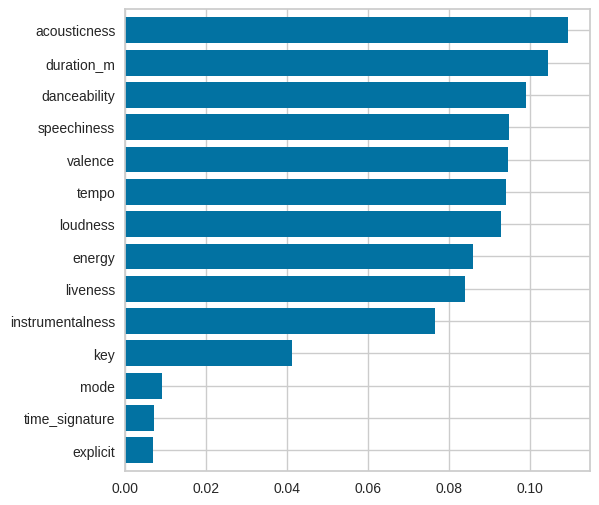

In [609]:
Y_pred_rf = random_forest.predict(x_test)
random_forest.score(x_train,y_train)
acc_random_forest = round(random_forest.score(x_train,y_train) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)